In [10]:
import pandas as pd
import numpy as np
from NegotiationConfig import *
import seaborn as sb
sb.set(rc={'figure.figsize':(16,9), 'figure.dpi':300})

In [2]:

# This contains data for each step performed
steps_data = pd.read_csv('results/run_2019-09-12 v-unreliable.csv', index_col=0)
steps_data['consensus_progress'] = 1. - steps_data['consensus_current']/steps_data['consensus_start']
#data = data[data['step']<=MAX_STEPS]

In [3]:
MAX_STEP_DF = steps_data['step'].max()
MAX_STEP_DF = 100
step_expanded = pd.DataFrame()
all_groups= list()


for g, group in steps_data.groupby(['sample', 'method', 'agent']):
    last_step = group['step'].max()
    last_step_row = group.loc[group['step']==last_step]
    #print('\r Processing sample {} of {}, agent {}'.format(group['sample'].max(), steps_data['sample'].max(), group['agent'].iloc[0]), end='')
    print('\r'+str(g), end='')
    replications = range(last_step+1, MAX_STEP_DF+1)
    if len(replications) > 0:
        filling = pd.concat([last_step_row]*len(replications), ignore_index=True)
        filling['step'] = replications
        filling['status'] = 'consensus'
        #step_expanded = pd.concat([step_expanded, group, filling], ignore_index=True)
        all_groups += [group, filling]
    else:
        all_groups += [group]
    
    #new_group = group.concat(last_step_row)
#     for step in :
#         last_step_row.loc[:,'step'] = step
#         last_step_row.loc[:,'status'] = 'consensus'
#         group = group.append(last_step_row, ignore_index=True, sort=False)
    #step_expanded = step_expanded.append(group, ignore_index=True, sort=False)
    #step_expanded.to_csv('results/results_visualization.csv')
    

(1559, 'v', 'ag_horse')

In [5]:
step_expanded = pd.concat(all_groups, ignore_index=True)

In [6]:
step_expanded.to_csv('results/results_visualization.csv')

In [12]:
only_last = pd.DataFrame()
for g, group in steps_data.groupby(['sample', 'method']):
    last_step = group.loc[group['step']==group['step'].max()]
    only_last = only_last.append(last_step, ignore_index=True)
    
only_last['AGR_vs_MV DSC'] = only_last['d_agr_gt_DSC']/only_last['d_mv_gt_DSC'] - 1

In [6]:
only_last.columns

Index(['sample', 'png_path', 'seg_path', 'method', 'step', 'agent', 'status',
       'consensus_start', 'consensus_current', 'd_prop_agr_MAE',
       'd_prop_agr_DSC', 'd_prop_gt_MAE', 'd_prop_gt_DSC', 'd_agr_gt_MAE',
       'd_agr_gt_DSC', 'd_mv_gt_MAE', 'd_mv_gt_DSC', 'd_mv_agr_MAE',
       'd_mv_agr_DSC', 'fp_agr_gt', 'fp_mv_gt', 'fp_prop_gt', 'fn_agr_gt',
       'fn_mv_gt', 'fn_prop_gt', 'tp_agr_gt', 'tp_mv_gt', 'tp_prop_gt',
       'tn_agr_gt', 'tn_mv_gt', 'tn_prop_gt', 'consensus_progress',
       'AGR_vs_MV DSC'],
      dtype='object')

In [7]:
sb.set(rc={'figure.figsize':(11.7,8.27)})

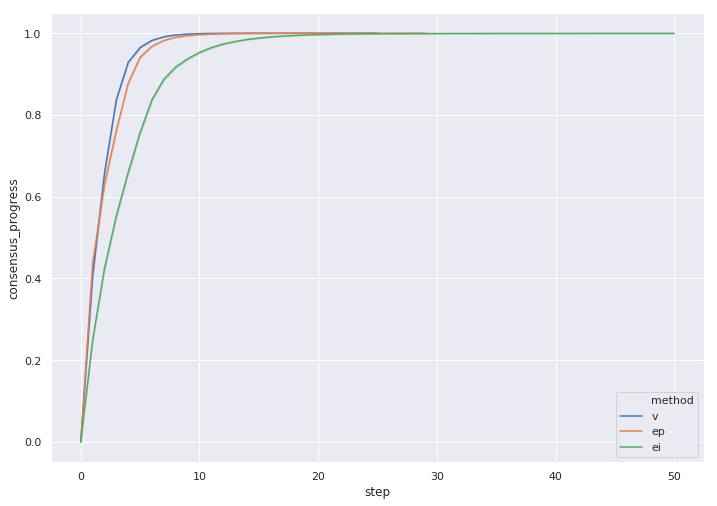

In [22]:
# Convergence speed
MAX_STEPS=50
sb.lineplot(data=steps_data[steps_data['step']<=MAX_STEPS], x='step', y='consensus_progress', hue='method')

ei: 0.9255032826658501
ep: 0.9284997808996032
v: 0.9223095934659165


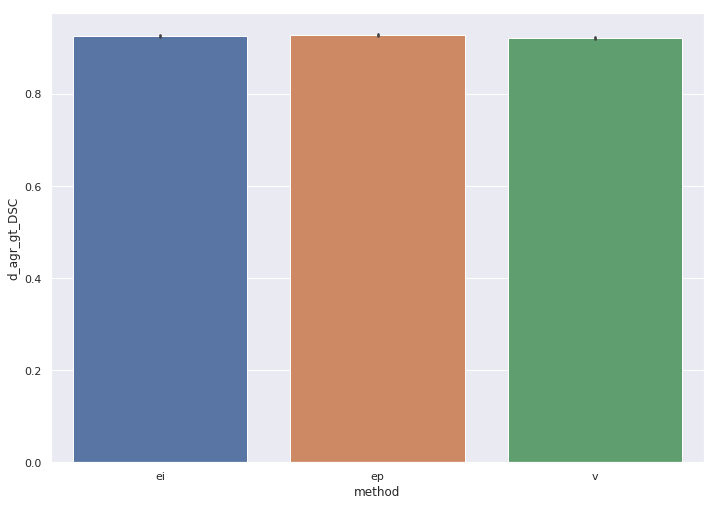

In [20]:
# Quality of the agreement wrt the ground truth
sb.barplot(data=only_last, x='method', y='d_agr_gt_DSC')
for method in only_last['method'].unique():
    print('{}: {}'.format(method, only_last[only_last['method']==method]['d_agr_gt_DSC'].mean()))

0.9212462248418303

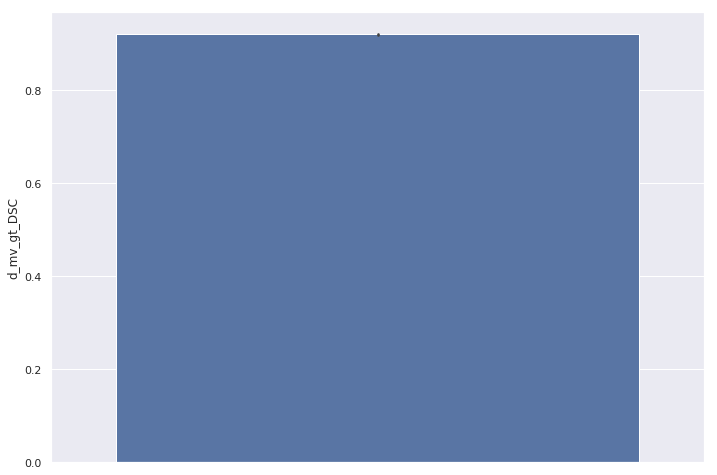

In [13]:
# Quality of majority voting
sb.barplot(data=only_last, y='d_mv_gt_DSC')
only_last['d_mv_gt_DSC'].mean()

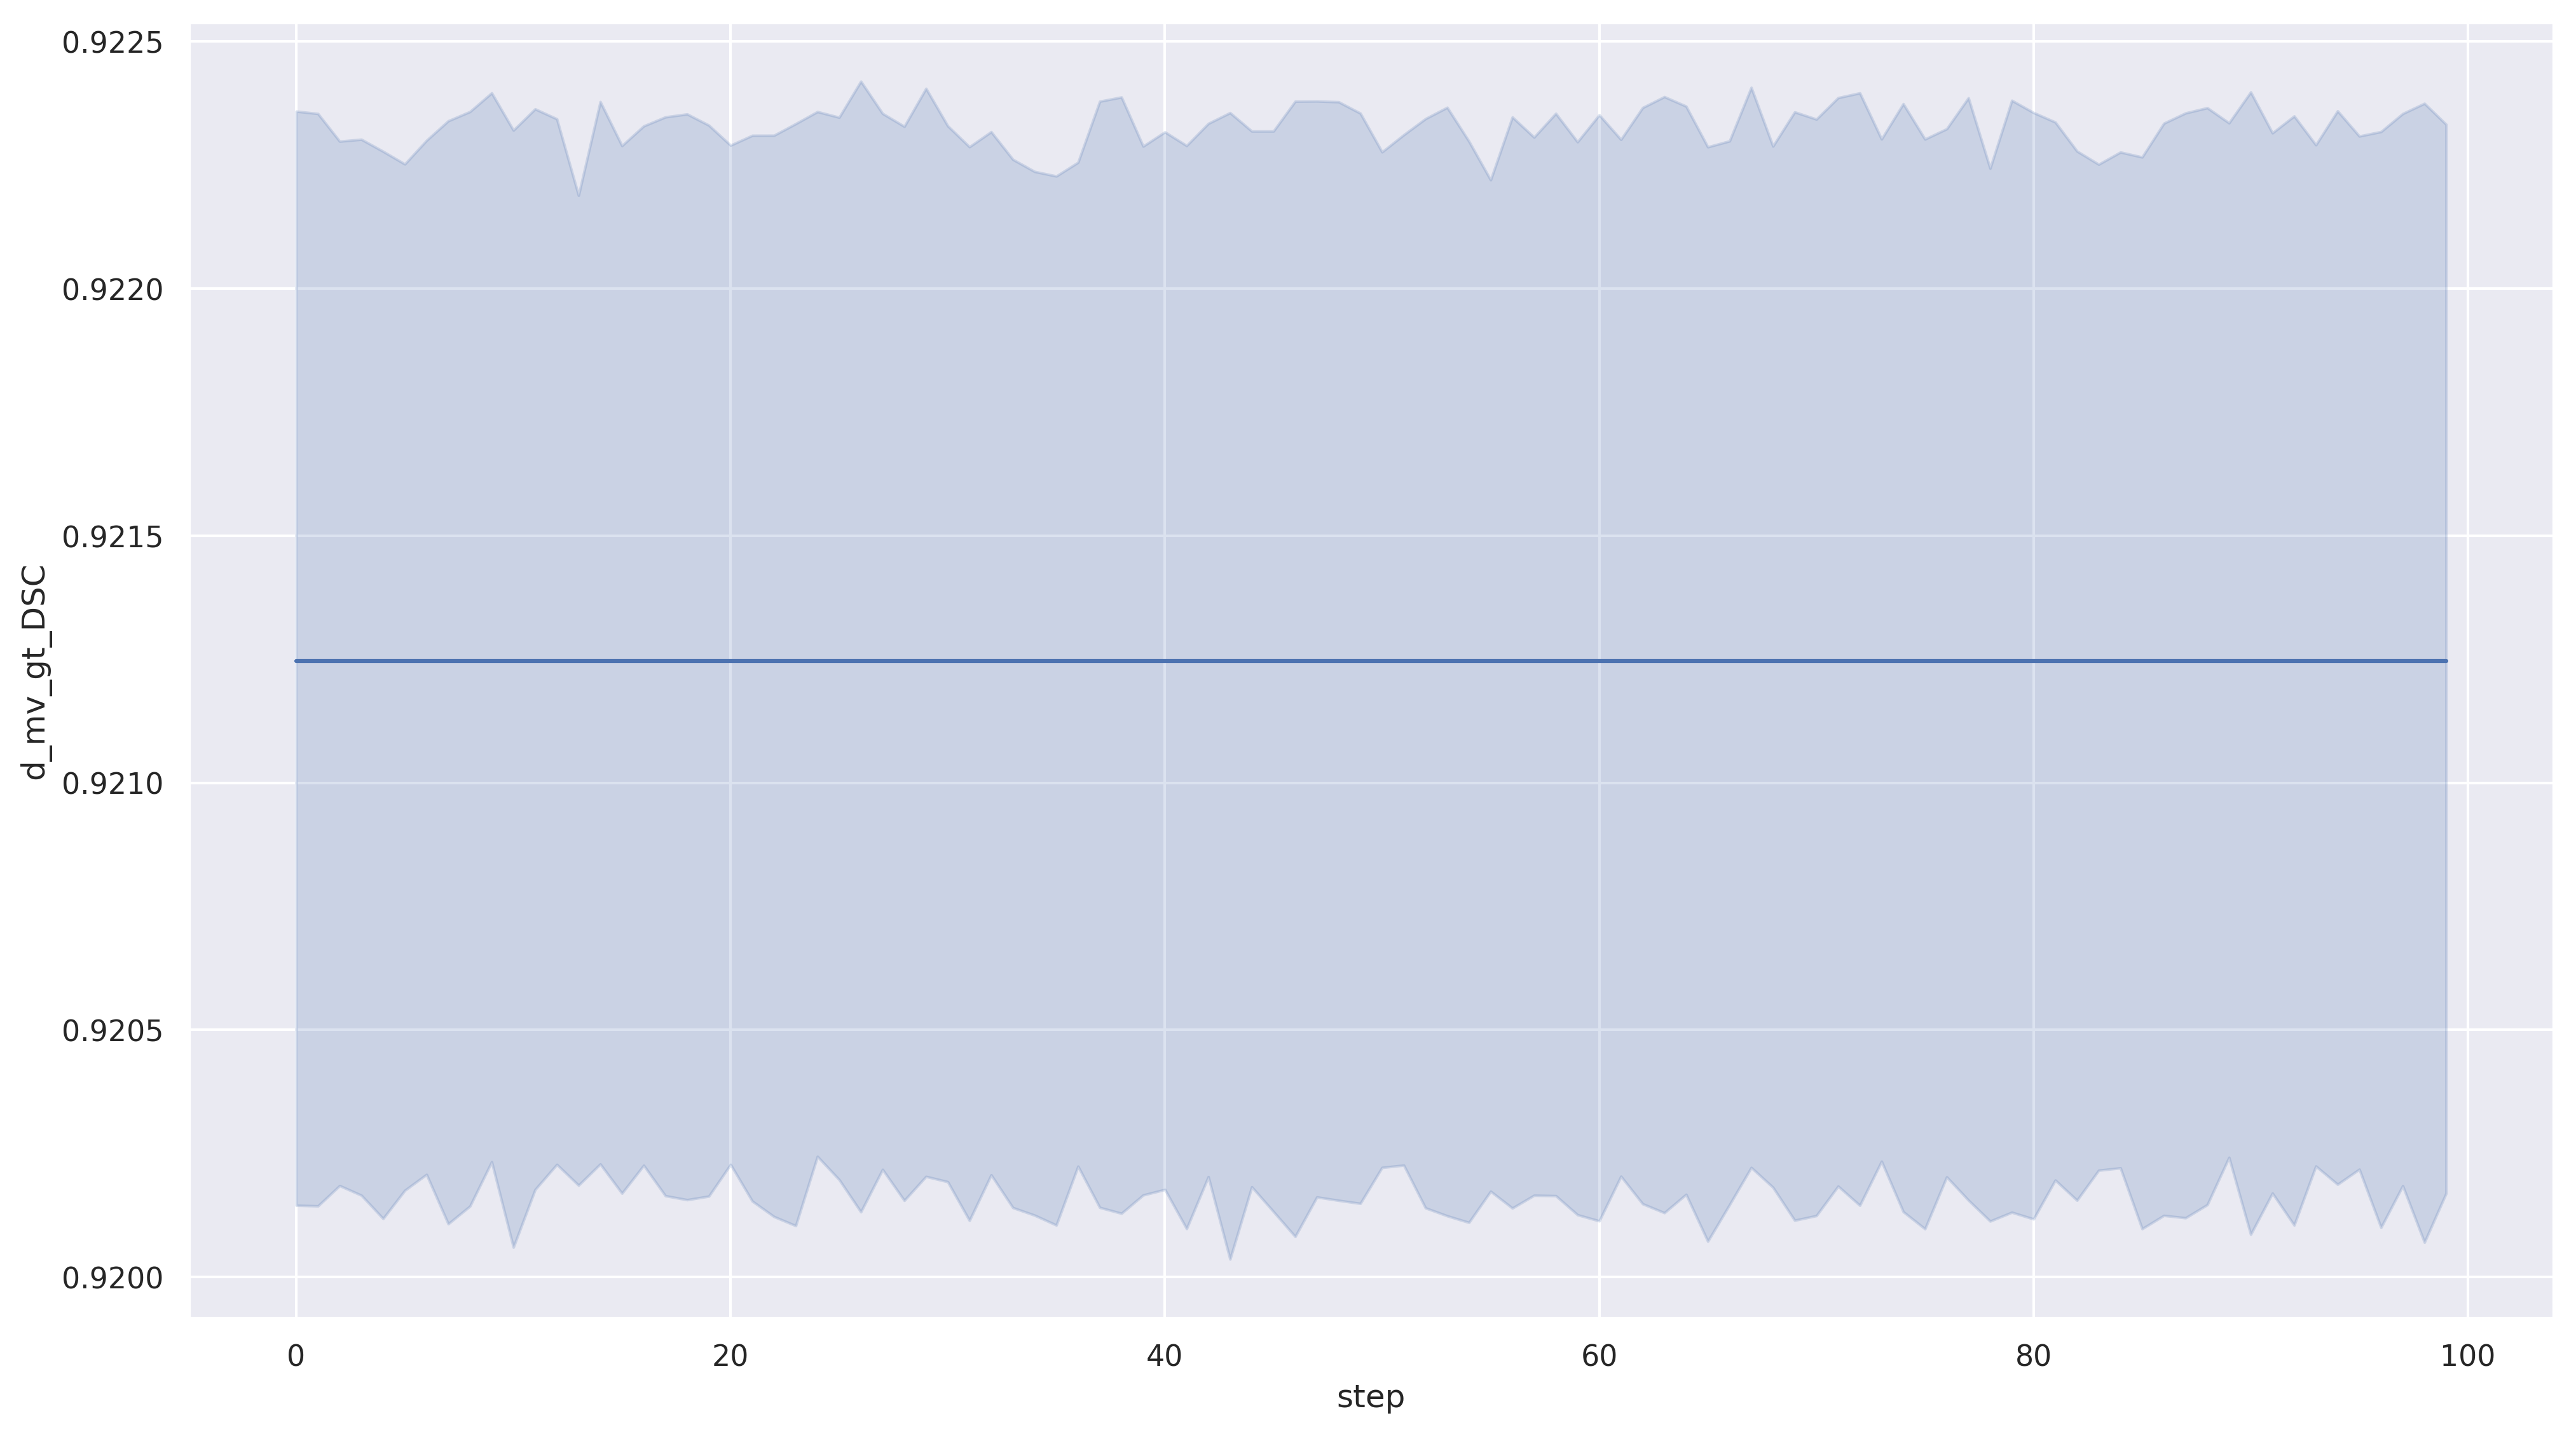

In [13]:
sb.lineplot(data=step_expanded[step_expanded['step']<100], x='step', y='d_mv_gt_DSC')

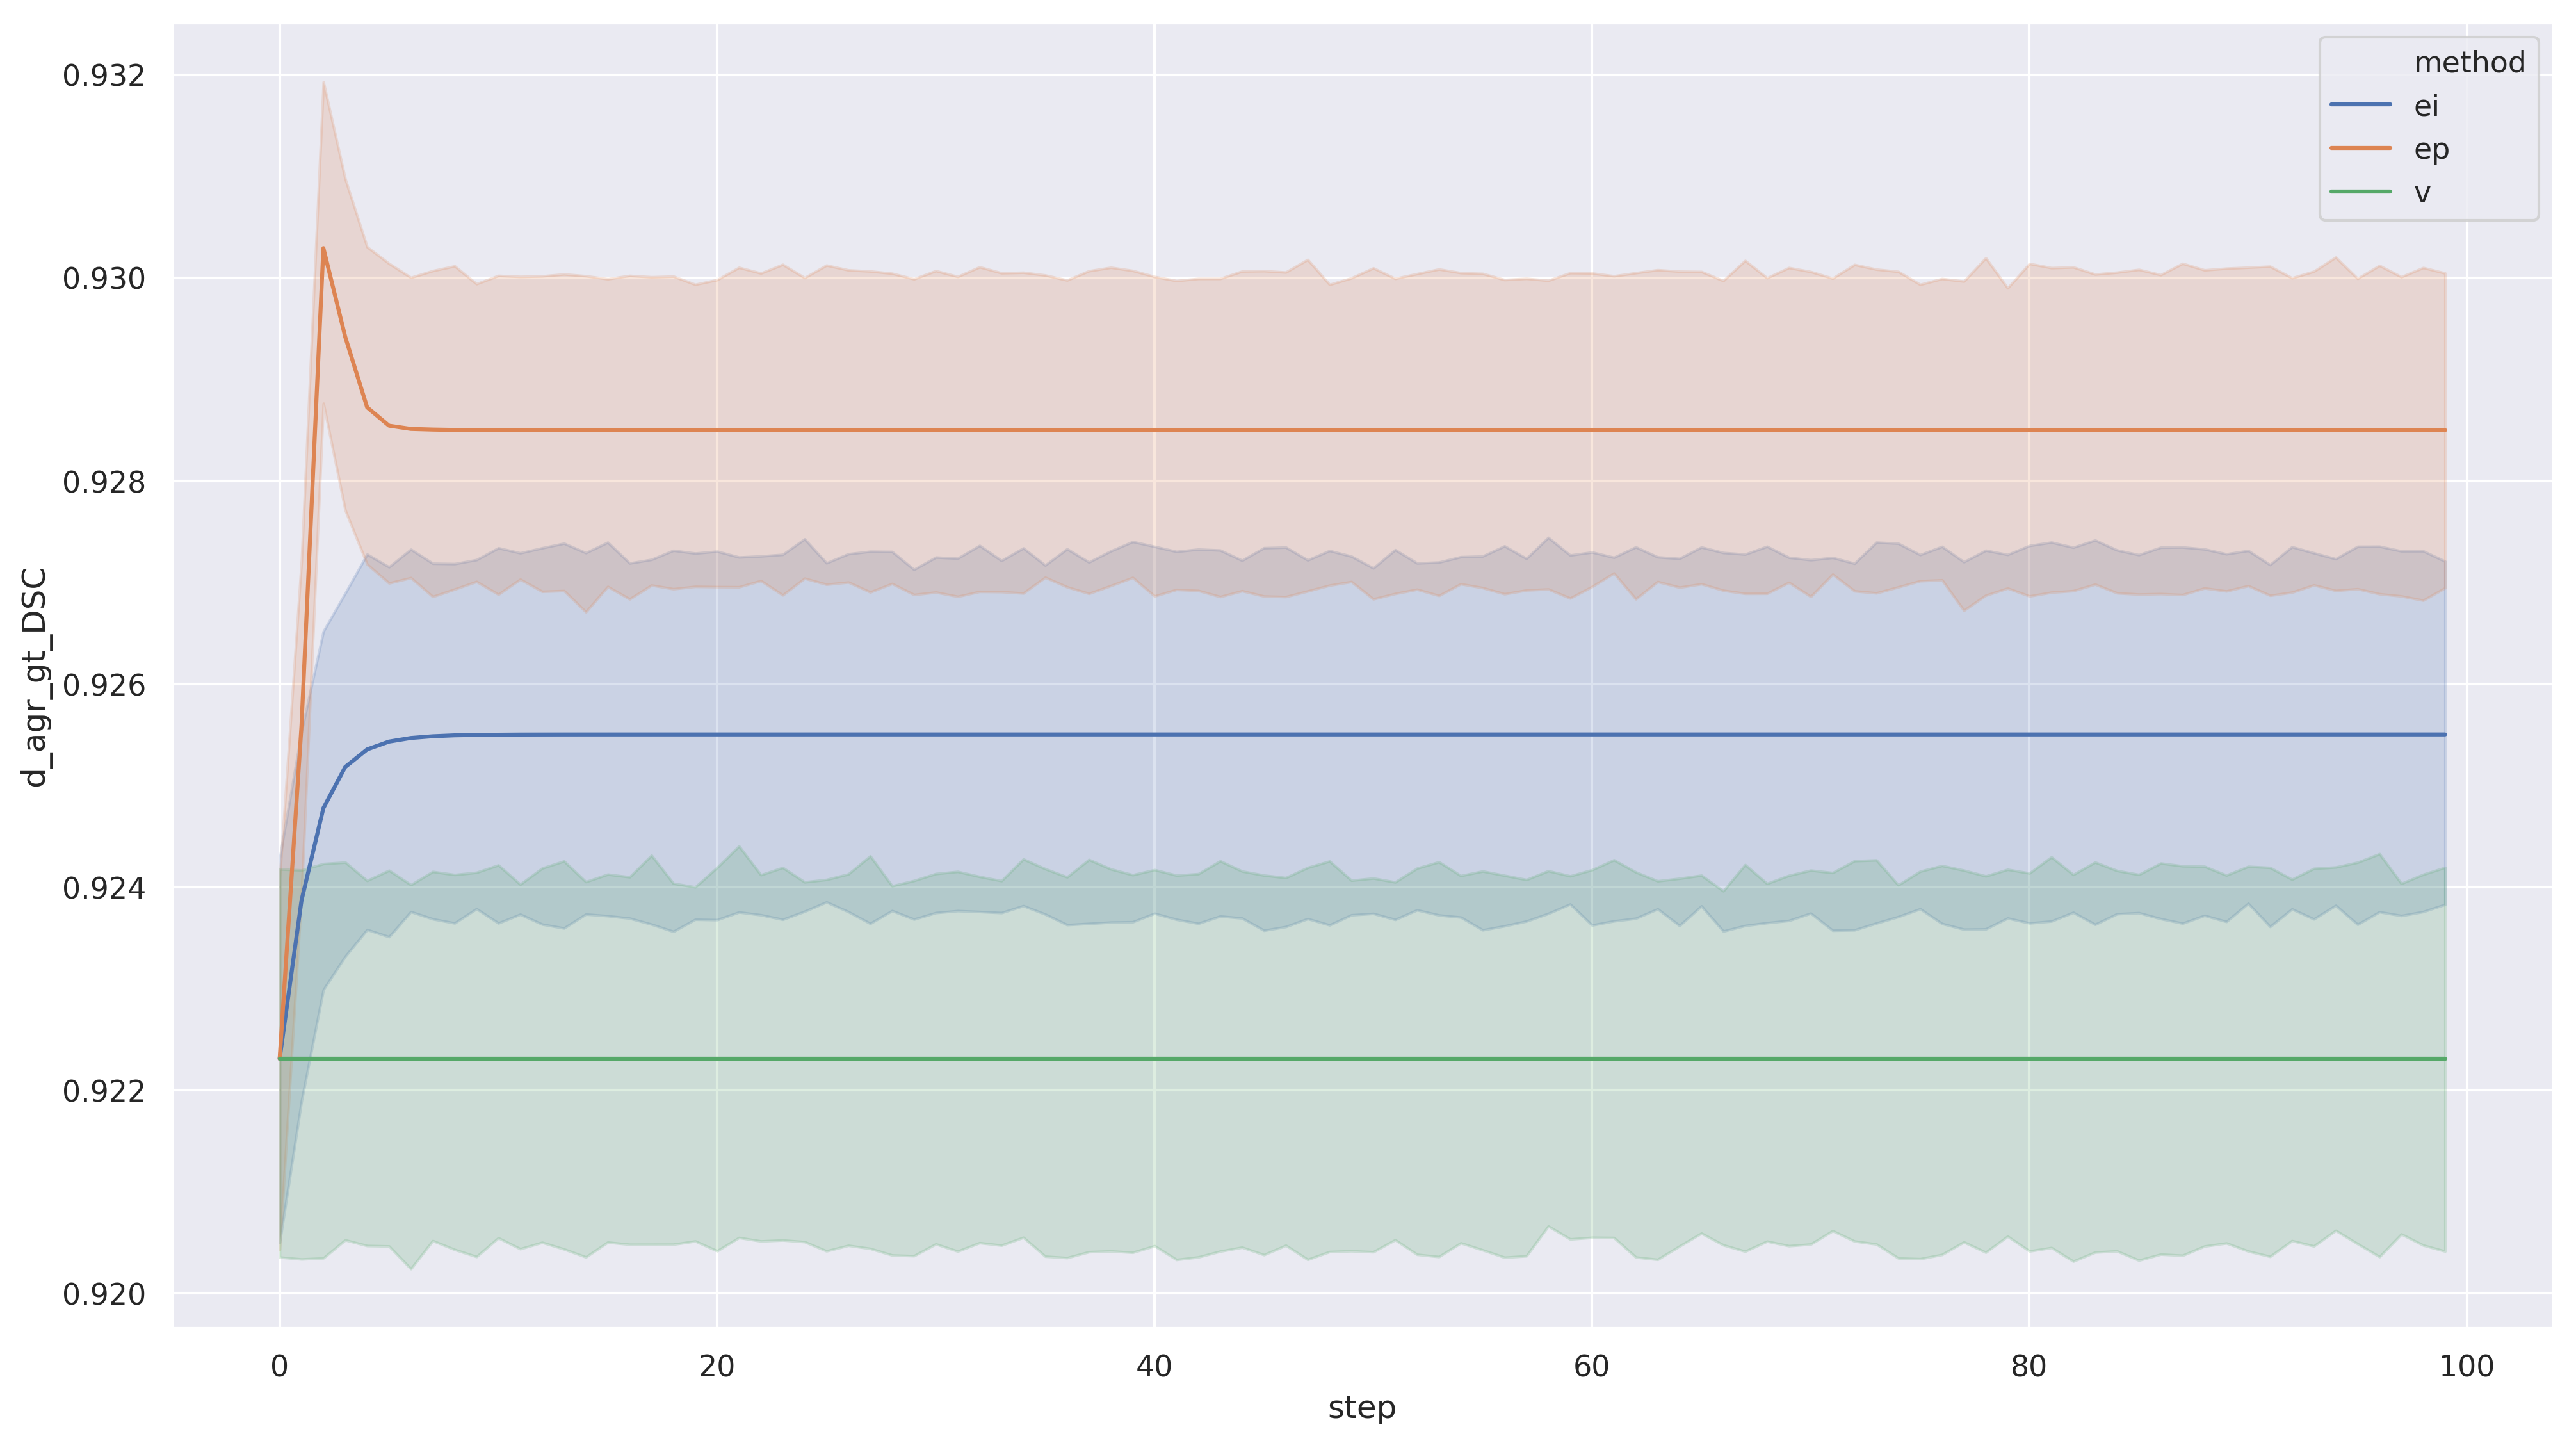

In [11]:
sb.lineplot(data=step_expanded[step_expanded['step']<100], x='step', y='d_agr_gt_DSC', hue='method')

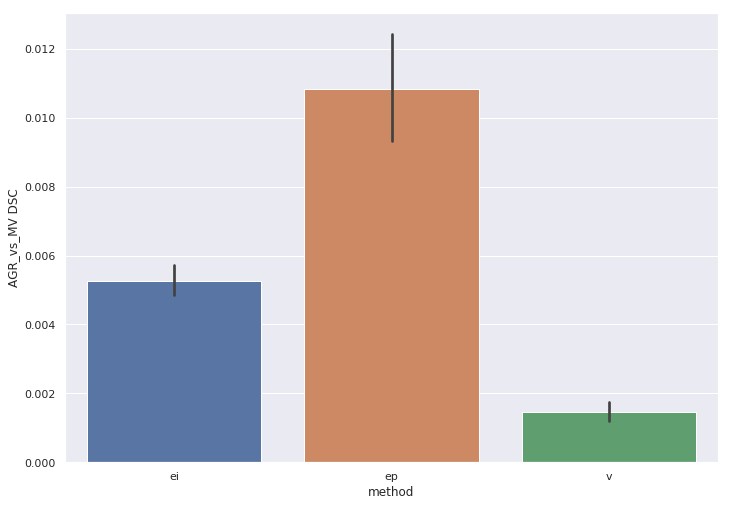

In [21]:
# Progress of Relative Performance vs Majority voting (1.0 performance)
#sb.violinplot(x='agent', y='step', hue='method', data=data)
sb.barplot(data=only_last, x='method', y='AGR_vs_MV DSC')

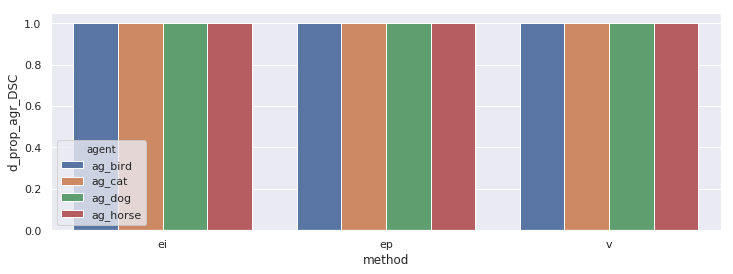

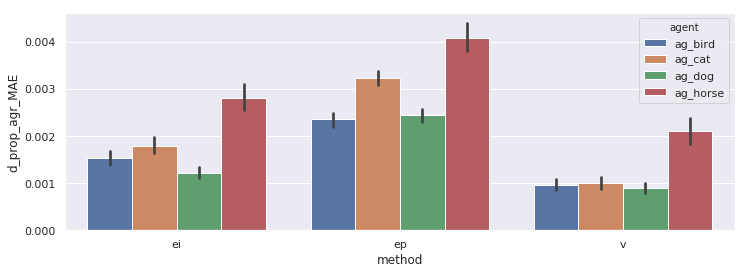

In [31]:
#Distance from each agent propsal to the agreement at the end of the negotiation. First (Dice Score), only account for majoritary label proposed by each agent. The second (MAE) accounts even for the agent uncertainty.
import matplotlib.pyplot as plt
#f, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5), sharex=True)
plt.figure(figsize=(12, 4))
sb.barplot(data=only_last, x='method', y='d_prop_agr_DSC', hue='agent')
plt.figure(figsize=(12, 4))
sb.barplot(data=only_last, x='method', y='d_prop_agr_MAE', hue='agent')

<Figure size 864x288 with 0 Axes>

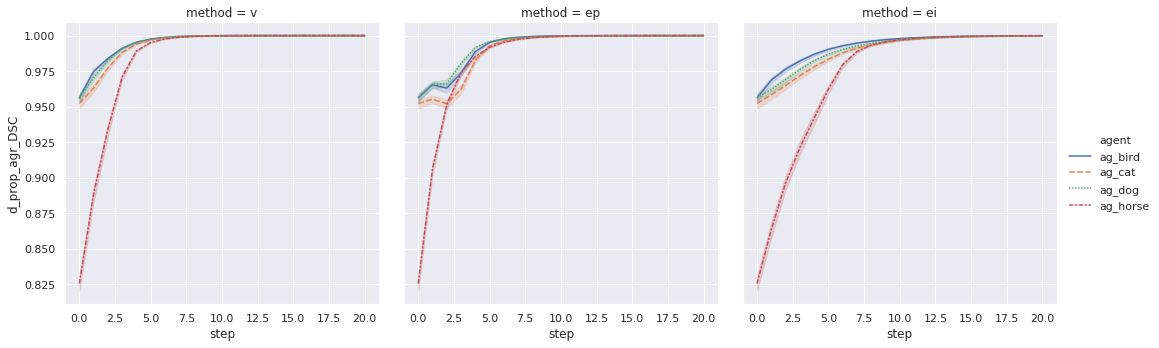

<Figure size 864x288 with 0 Axes>

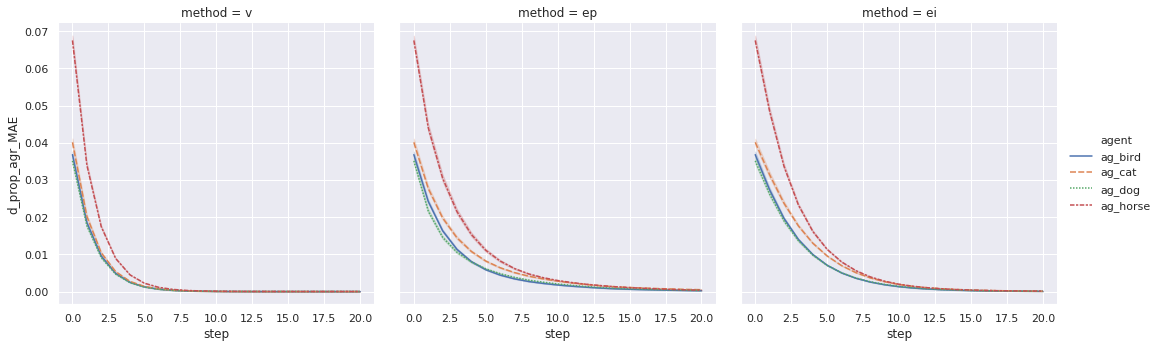

In [34]:
#Distance from each agent propsal to the agreement for each step. First (Dice Score), only account for majoritary label proposed by each agent. The second (MSE) accounts even for the agent uncertainty.
import matplotlib.pyplot as plt
#f, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5), sharex=True)
STEP_LIMIT=20
plt.figure(figsize=(12, 4))
sb.relplot(data=steps_data[steps_data['step']<=STEP_LIMIT], x='step', y='d_prop_agr_DSC', kind='line', hue='agent', style='agent', col='method', facet_kws={'sharey':'row'})
plt.figure(figsize=(12, 4))
sb.relplot(data=steps_data[steps_data['step']<=STEP_LIMIT], x='step', y='d_prop_agr_MAE', kind='line', hue='agent', style='agent', col='method', facet_kws={'sharey':'row'})

## Test performances

In [47]:
model_perf = pd.read_csv('results/model_ep1_test_performances.csv', index_col='model_label')

In [50]:
agreement_perf = pd.DataFrame()
for (method, agent_name), group in only_last.groupby(['method', 'agent']):
    break
    #agreement_perf = agreement_perf.appen()

In [44]:
group['d_agr_gt_DSC'].mean()

0.9255032826658504

In [48]:
model_perf

,dice_score,mae,dice_score_z,mae_z
model_label,,,,
bird,0.913127,0.056573,0.593294,-0.534424
cat,0.918943,0.049520,0.726249,-0.846117
dog,0.904710,0.061402,0.400881,-0.321048
horse,0.811915,0.107170,-1.720424,1.701589


In [49]:
g

('ei', 'ag_bird')